In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from mpl_toolkits.mplot3d import axes3d
from sklearn import preprocessing
from numpy import count_nonzero, median, percentile
from google.colab import drive

drive.mount('/content/drive')

data_frame_original =  pd.read_csv('/content/drive/My Drive/MSC/master.csv')


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#Data pre-processing
#Checks the data frame information
data_frame_original.info()

#Checks the data frame shape
print('\nData frame shape: ', data_frame_original.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB

Data frame shape:  (27820, 12)


In [0]:
#Check if any any column contains null values
data_frame_original.isnull().any()

country               False
year                  False
sex                   False
age                   False
suicides_no           False
population            False
suicides/100k pop     False
country-year          False
HDI for year           True
 gdp_for_year ($)     False
gdp_per_capita ($)    False
generation            False
dtype: bool

In [0]:
data_frame_original.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [0]:
country_count = len(data_frame_original.country.unique())
print('unique country count: ', country_count)

year_count = len(data_frame_original.year.unique())
print('unique year count: ', year_count)

sex_count = len(data_frame_original.sex.unique())
print('unique sex count: ', sex_count)

age_count = len(data_frame_original.age.unique())
print('unique age count: ', age_count)

expected_no_of_records = year_count*country_count*sex_count*age_count
print('expected number of records: ', expected_no_of_records)

actual_no_of_records = data_frame_original.year.count()
print('actual number of records: ', actual_no_of_records)

number_of_missing_records = expected_no_of_records - actual_no_of_records
print('number of missing records: ', number_of_missing_records)

expected_record_count_per_country = year_count*sex_count*age_count
print('expected record count per country: ', expected_record_count_per_country)

expected_record_count_per_year = country_count*sex_count*age_count
print('expected record count per year: ', expected_record_count_per_year)

unique country count:  101
unique year count:  32
unique sex count:  2
unique age count:  6
expected number of records:  38784
actual number of records:  27820
number of missing records:  10964
expected record count per country:  384
expected record count per year:  1212


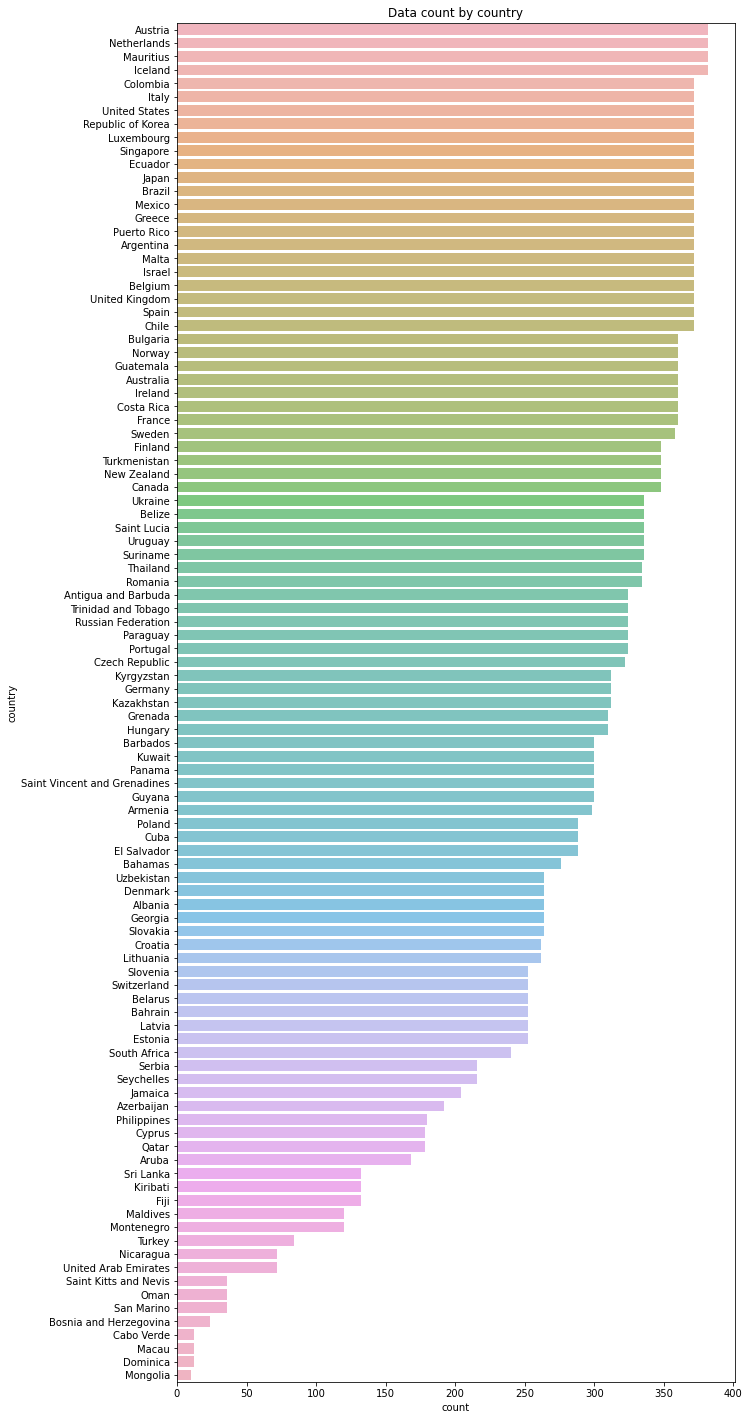

In [0]:
#Data count by country
alpha = 0.7
plt.figure(figsize=(10,25))
sns.countplot(y='country', data=data_frame_original, alpha=alpha, order = data_frame_original['country'].value_counts().index)
plt.title('Data count by country')
plt.show()

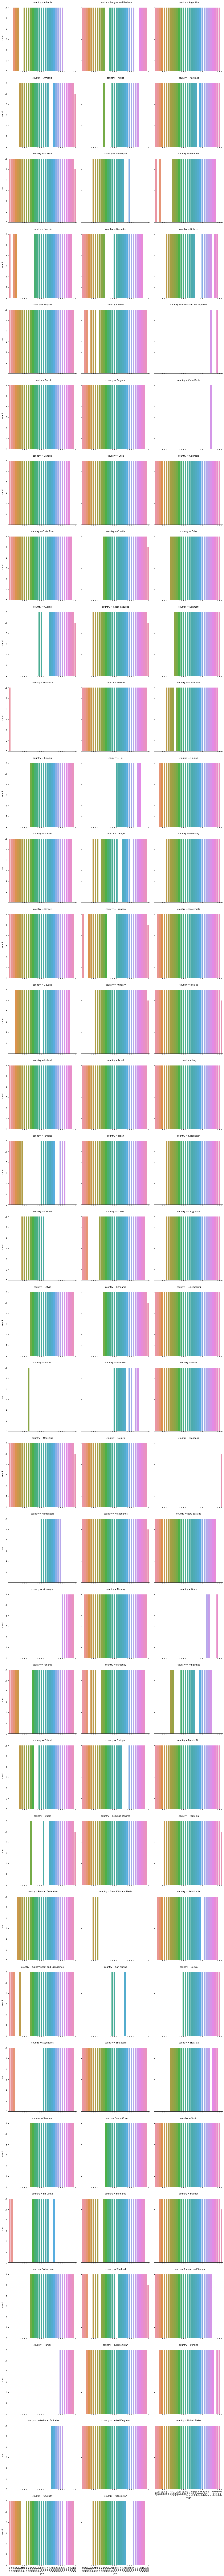

In [0]:
#Data count for each country
ax = sns.catplot('year','population',col='country',data=data_frame_original,kind='bar',col_wrap=3,estimator=count_nonzero)
ax.set_xticklabels(rotation=90)
ax.set_ylabels(label='count', fontsize=10)

In [4]:
#Removing countries having records less than the Q3 of the total number of records , TODO: Add how 288 came

q3 = expected_record_count_per_country*0.75

data_frame_original = data_frame_original.groupby(['country']).filter(lambda x: x.country.count() >= 288)

data_frame_original.info()

country_count = len(data_frame_original.country.unique())

print('unique country count after modification: ', country_count)


NameError: ignored

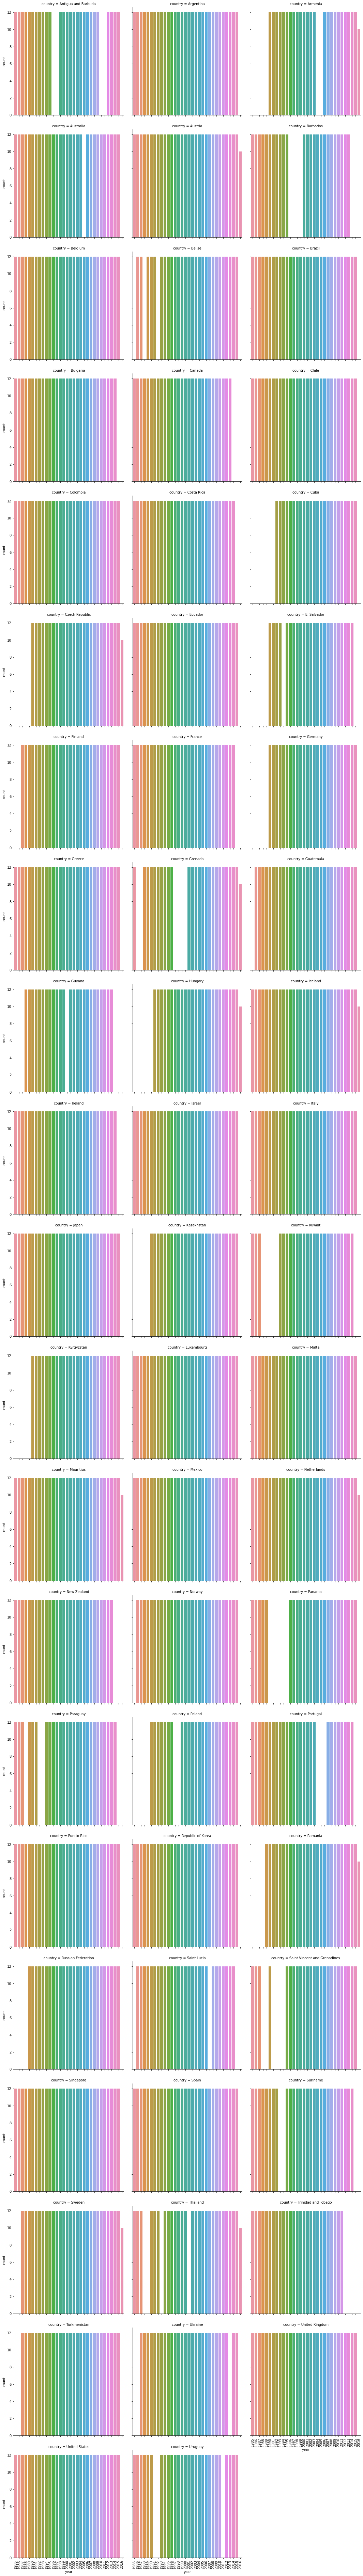

In [0]:
#Data count for each country after modifications

ax = sns.catplot('year','population',col='country',data=data_frame_original,kind='bar',col_wrap=3,estimator=count_nonzero)
ax.set_xticklabels(rotation=90)
ax.set_ylabels(label='count', fontsize=10)


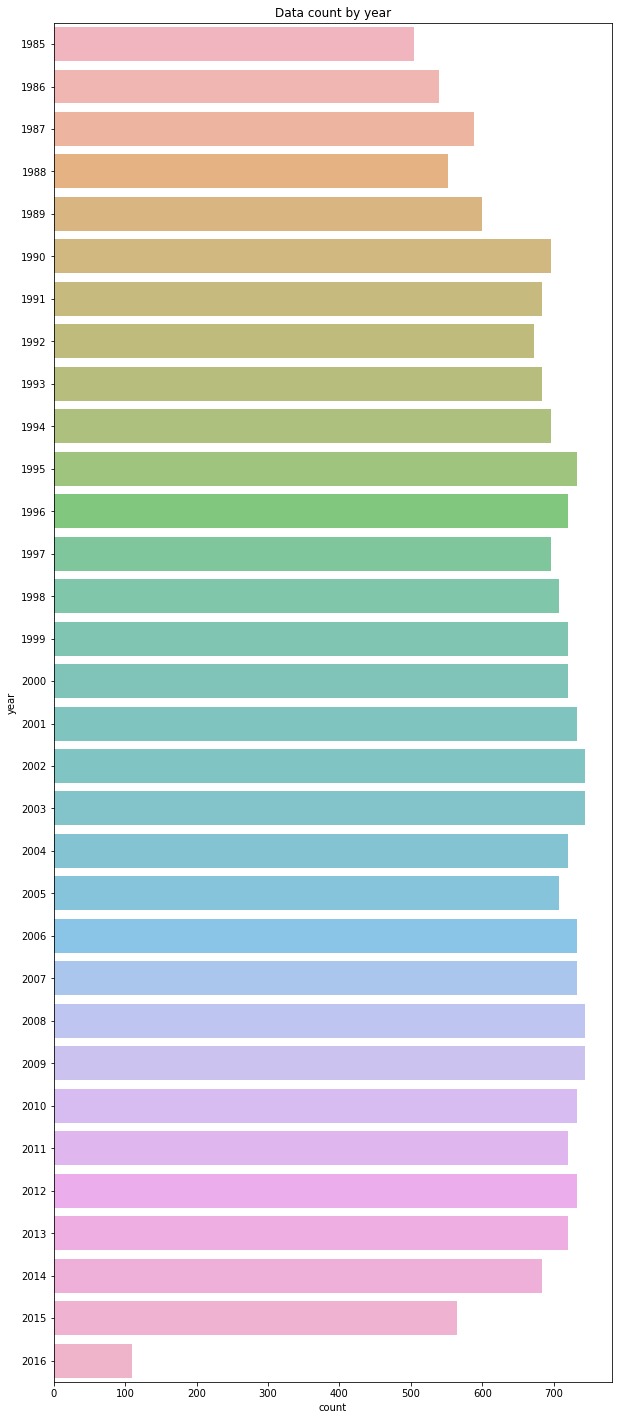

In [0]:
#Data count by year
alpha = 0.7
plt.figure(figsize=(10,25))
sns.countplot(y='year', data=data_frame_original, alpha=alpha)
plt.title('Data count by year')
plt.show()

In [5]:

#Removing year 2016 as the records number is low
data_frame_original.drop(data_frame_original[data_frame_original['year'] > 2015].index, inplace = True) 

#Renaming
data_frame_original.columns = ['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides100kpop', 'country_year', 'HDI_for_year',
       'gdpPerYear', 'gdpPerCapita', 'generation']

#Converting gdpPerYear from object to a number ------------ NOT WORKING
data_frame_original['gdpPerYear'] = data_frame_original['gdpPerYear'].str.replace(',','').astype(str).astype(int)

data_frame_original.info()

data_frame_l = data_frame_original.copy()
data_frame_p = data_frame_original.copy()
data_frame_t = data_frame_original.copy()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 27660 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          27660 non-null  object 
 1   year             27660 non-null  int64  
 2   sex              27660 non-null  object 
 3   age              27660 non-null  object 
 4   suicides_no      27660 non-null  int64  
 5   population       27660 non-null  int64  
 6   suicides100kpop  27660 non-null  float64
 7   country_year     27660 non-null  object 
 8   HDI_for_year     8364 non-null   float64
 9   gdpPerYear       27660 non-null  int64  
 10  gdpPerCapita     27660 non-null  int64  
 11  generation       27660 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.7+ MB


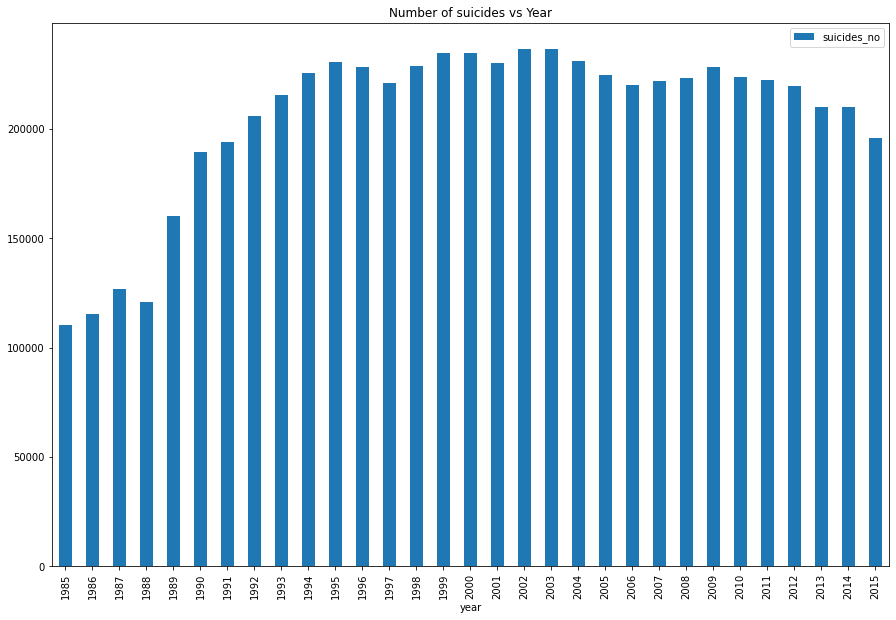

In [0]:
data_frame_t.groupby(by=['year'])['suicides_no'].sum().reset_index().plot(x='year', y='suicides_no', kind='bar' , figsize=(15,10) , title = 'Number of suicides vs Year')

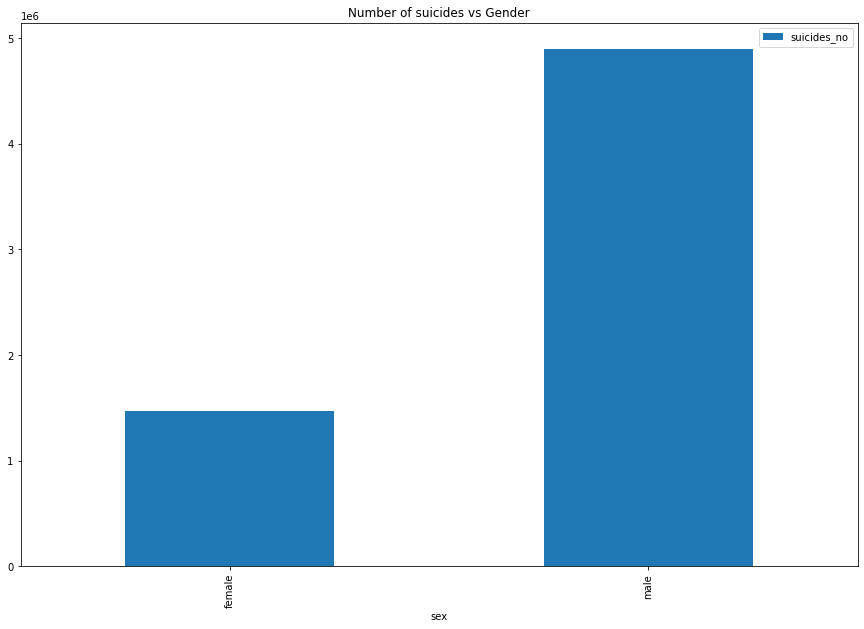

In [0]:
data_frame_t.groupby(by=['sex'])['suicides_no'].sum().reset_index().plot(x='sex', y='suicides_no', kind='bar' , figsize=(15,10) , title = 'Number of suicides vs Gender')

Text(0, 0.5, 'Age Group')

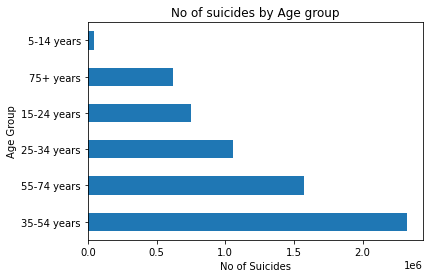

In [0]:
ax1_t = data_frame_t.groupby(by=['age']).suicides_no.sum().nlargest(10).plot(kind='barh', title='No of suicides by Age group')
ax1_t.set_xlabel("No of Suicides")
ax1_t.set_ylabel("Age Group")

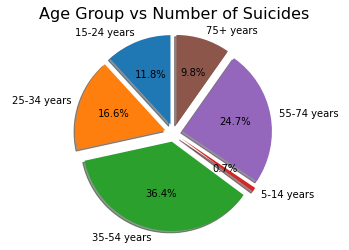

In [0]:
df1 = data_frame_l.groupby('age', as_index=False)['suicides_no'].sum()
df2 = data_frame_l['suicides_no'].sum()

df3 = round((((df1.suicides_no)/df2) * 100),2)

class Data:
  def __init__(self, generation, value):
    self.generation = generation
    self.value = value

p1 = Data(df1.age, round((((df1.suicides_no)/df2) * 100),2))

fig1, ax3_l = plt.subplots()
ax3_l.pie(p1.value, explode=[0.1,0.1,0.1,0.1,0.1,0.1], labels=p1.generation, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax3_l.set_title('Age Group vs Number of Suicides', fontsize=16)
ax3_l.axis('equal')
plt.show()

Text(0.5, 0.98, 'Number of suicides Vs Gender ')

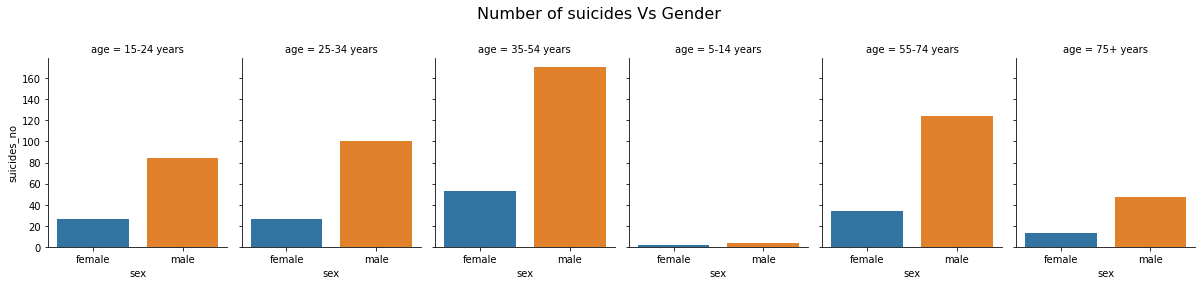

In [0]:
ax2_t = sns.catplot(x="sex", y="suicides_no", col="age", data=data_frame_t, estimator=median, height=4, aspect=0.7, kind="bar", ci=None)
plt.subplots_adjust(top=0.8)
ax2_t.fig.suptitle('Number of suicides Vs Gender ' , fontsize=16)

Text(0.5, 1.0, 'Number of suicides Vs Year ')

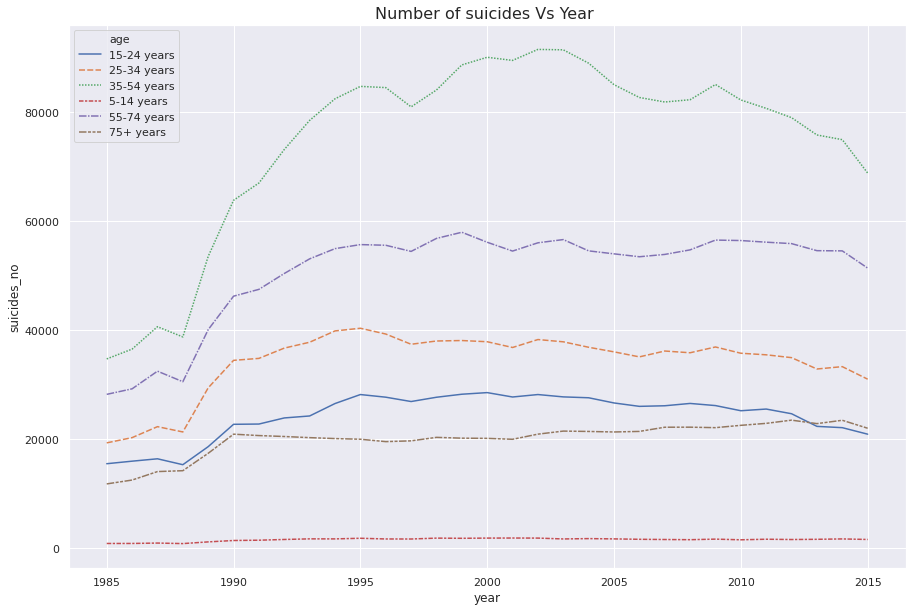

In [0]:
df2_t = data_frame_t.groupby(['year','age']).suicides_no.sum().reset_index()
df2_t['age'] = df2_t.age.astype(pd.api.types.CategoricalDtype(categories = ['5-14 years','15-24 years','25-34 years','35-54 years','55-74 years','75+ years']))
sns.set(rc={'figure.figsize':(15,10)})
ax3_t = sns.lineplot('year','suicides_no',hue='age',style='age',data=df2_t, sort=False)
ax3_t.set_title('Number of suicides Vs Year ' , fontsize=16)

Text(0, 0.5, 'Generation')

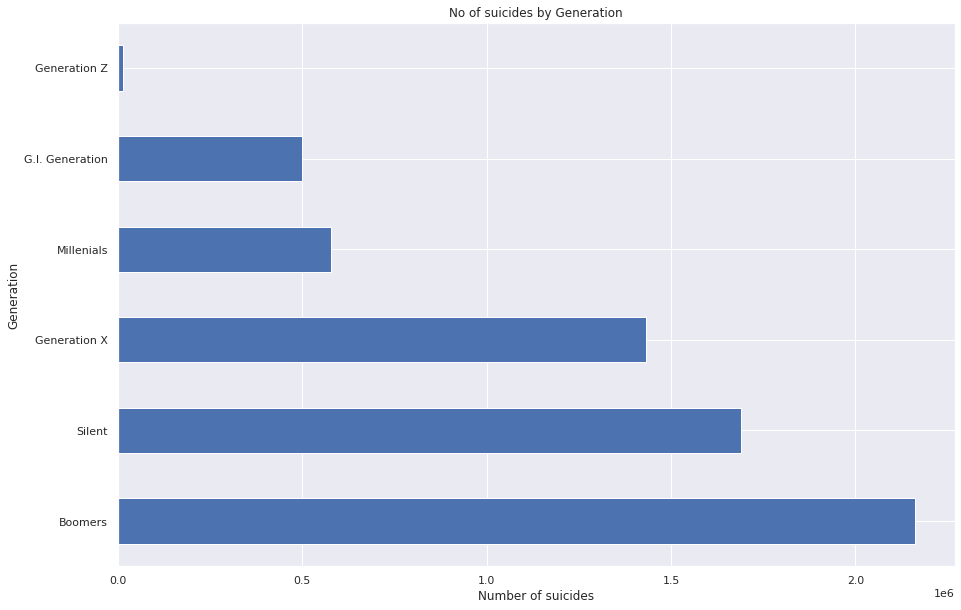

In [0]:
ax1_t = data_frame_t.groupby(by=['generation']).suicides_no.sum().nlargest(10).plot(kind='barh', title='No of suicides by Generation')
ax1_t.set_xlabel("Number of suicides")
ax1_t.set_ylabel("Generation")

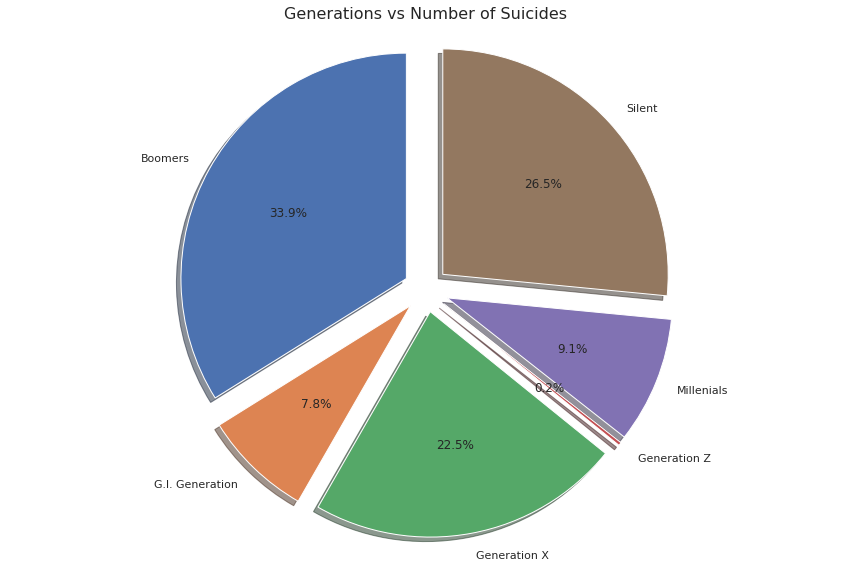

In [0]:
df1_l = data_frame_l.groupby('generation', as_index=False)['suicides_no'].sum()
df2_l = df1_l['suicides_no'].sum()

class Data:
  def __init__(self, generation, value):
    self.generation = generation
    self.value = value

p1_l = Data(df1_l.generation, round((((df1_l.suicides_no)/df2_l) * 100),2))

fig1_l, ax1_l = plt.subplots()
ax1_l.pie(p1_l.value, explode=[0.1,0.1,0.1,0.1,0.1,0.1], labels=p1_l.generation, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1_l.set_title('Generations vs Number of Suicides', fontsize=16)
ax1_l.axis('equal')
plt.show()

Text(0.5, 0.98, 'Number of suicides Vs Generation ')

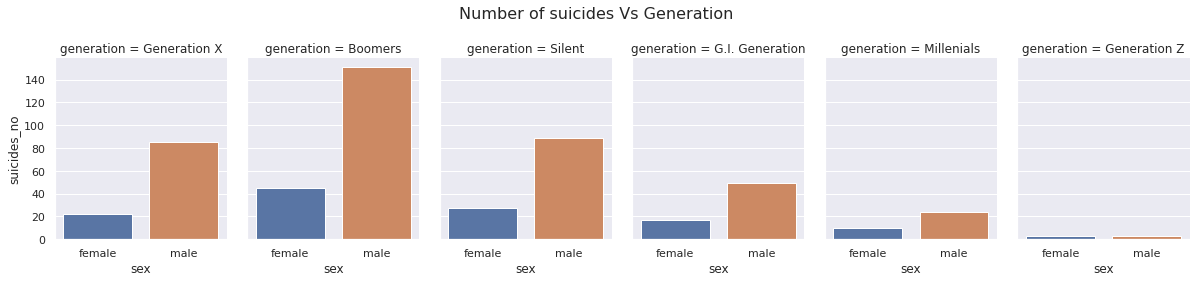

In [0]:
ax3_t = sns.catplot(x="sex", y="suicides_no", col="generation", data=data_frame_t, estimator=median, height=4, aspect=0.7, kind="bar", ci=None)
plt.subplots_adjust(top=0.8)
ax3_t.fig.suptitle('Number of suicides Vs Generation ' , fontsize=16)

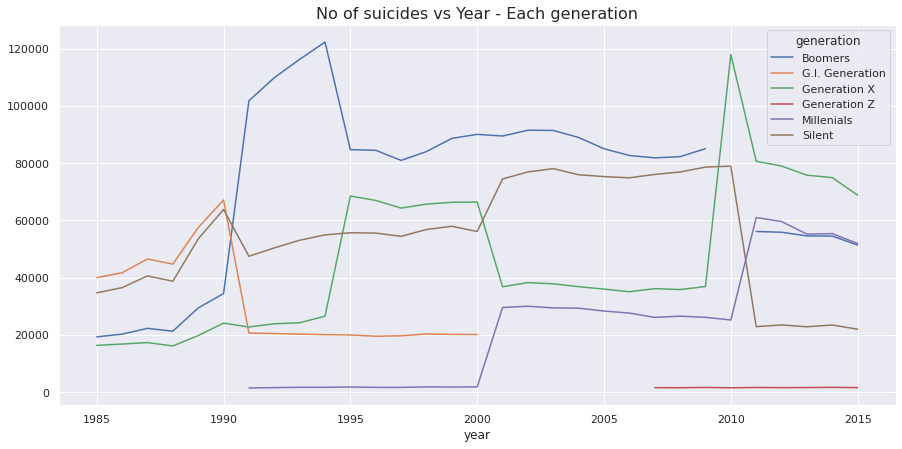

In [0]:
fig, ax2_l = plt.subplots(figsize=(15,7))
ax2_l.set_title('No of suicides vs Year - Each generation', fontsize=16)
data_frame_l.groupby(['year','generation']).sum()['suicides_no'].unstack().plot(ax=ax2_l)

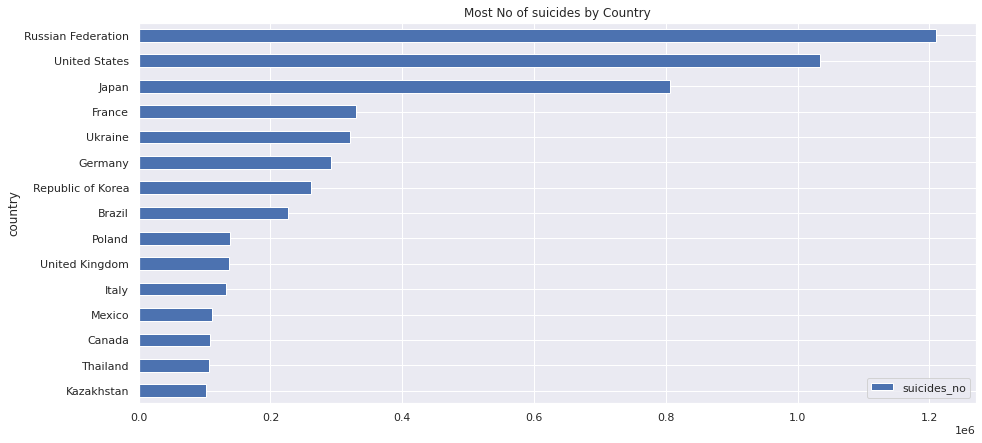

In [0]:
ax4_t = data_frame_t.groupby(by=['country'])['suicides_no'].sum().reset_index().sort_values(['suicides_no'], ascending=True).tail(15).plot(x='country', y='suicides_no', kind='barh', title='Most No of suicides by Country',figsize=(15,7))

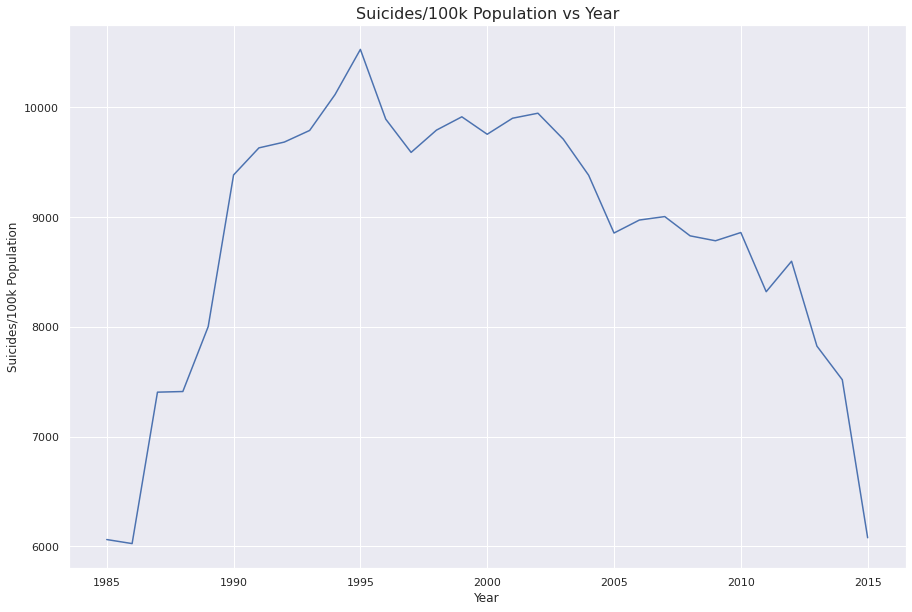

In [0]:
df1_l = data_frame_l.groupby('year', as_index=False)['suicides100kpop'].sum()

plt.plot(df1_l.year,df1_l.suicides100kpop)
plt.title('Suicides/100k Population vs Year', fontsize=16)
plt.ylabel('Suicides/100k Population')
plt.xlabel('Year')
plt.show()

In [0]:
df1 = px.data.gapminder()
suic_sum = pd.DataFrame(round(data_frame_l['suicides100kpop'].groupby(data_frame_l['country']).sum()))

def reg(x):
    if x=='Russia':
        res = 'Russian Federation'
    else:
        res=x
    return res
df1['country'] = df1['country'].apply(reg)

data_full = pd.merge(suic_sum,df1[['country', 'iso_alpha','continent','pop','year']],left_on='country',right_on='country',how='inner')

fig = px.scatter_geo(data_full, locations="iso_alpha", color="continent",
                     hover_name="country", size="suicides100kpop",
                     projection="natural earth")
fig.show()

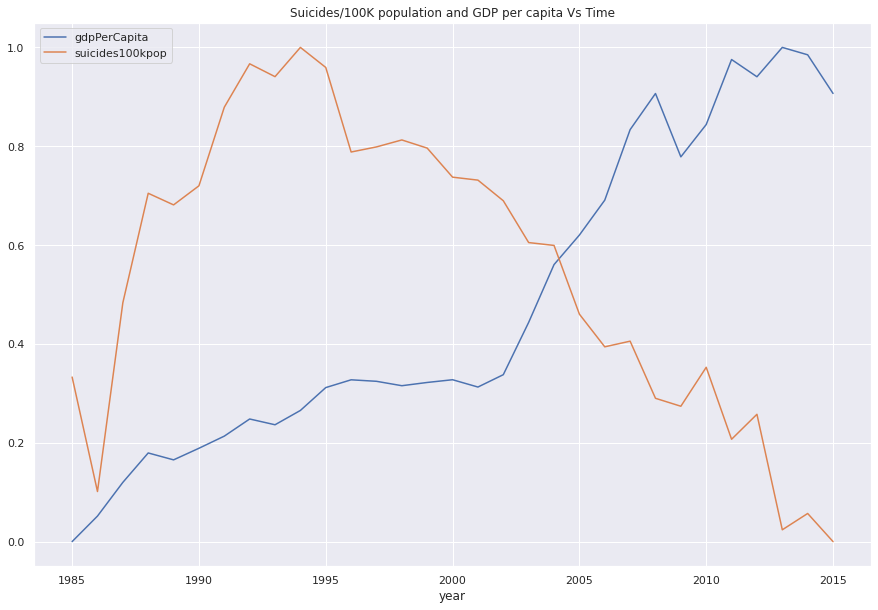

In [0]:
df_mean= data_frame_t.pivot_table(['suicides100kpop','gdpPerCapita'],
               ['year'], aggfunc='mean')
x = df_mean.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)

df_mean_scaled = pd.DataFrame(x_scaled)
df_mean_scaled.columns = df_mean.columns
df_mean_scaled.index = df_mean.index

df_mean_scaled.plot( title = 'Suicides/100K population and GDP per capita Vs Time')

Text(0.5, 1.0, 'Suicides/100K population Vs GDP per Capita')

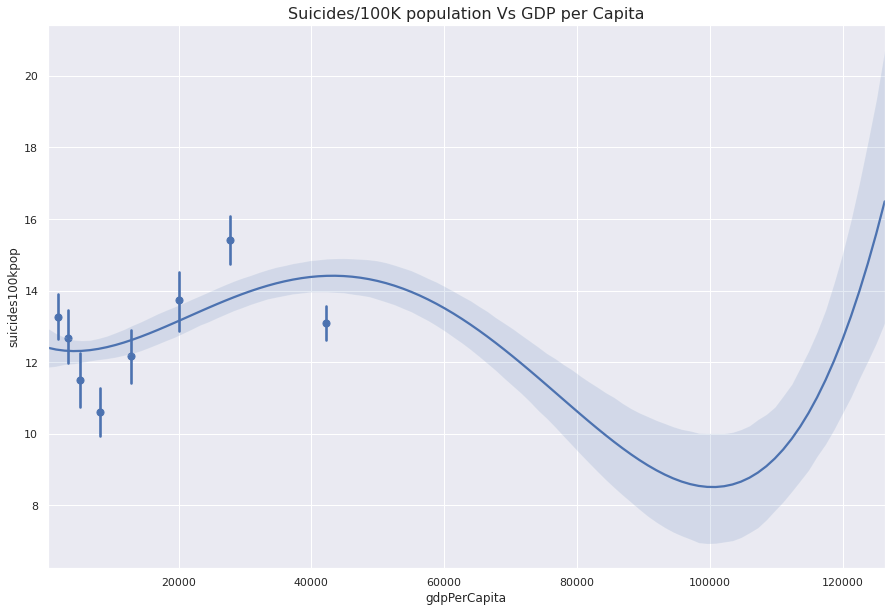

In [0]:
sns.set(style='darkgrid')
sns.set(rc={'figure.figsize': (15,10)})
ax5_t=sns.regplot(data=data_frame_t, x='gdpPerCapita', y='suicides100kpop', x_jitter=0.2, order=4, x_bins=8)
ax5_t.set_title('Suicides/100K population Vs GDP per Capita', fontsize = 16)

Text(0.5, 0.98, 'Population Vs No of suicides')

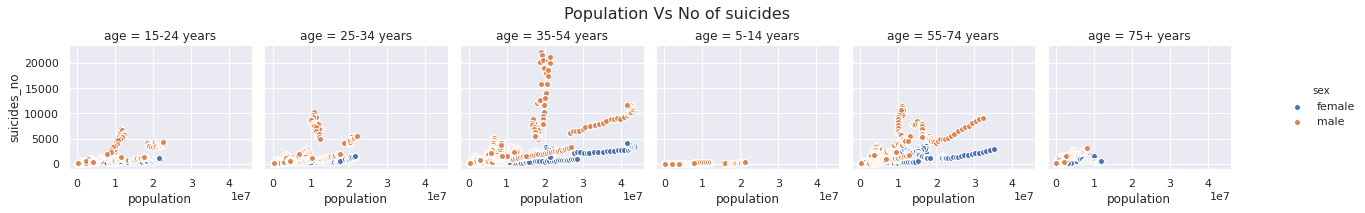

In [0]:
sns.set(style='darkgrid')
g = sns.FacetGrid(data_frame_t, col='age',hue='sex', margin_titles=True)
g = (g.map(plt.scatter, 'population', 'suicides_no', edgecolor='w')).add_legend()
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Population Vs No of suicides' , fontsize=16)

Text(0.5, 0.98, 'GDP per Capita Vs No of suicides')

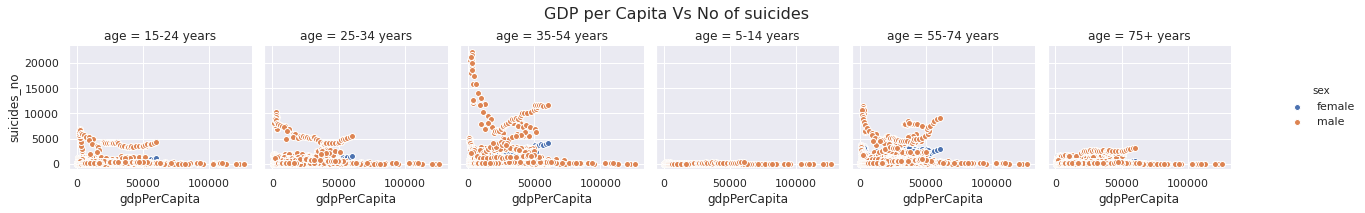

In [0]:
sns.set(style='darkgrid')
g = sns.FacetGrid(data_frame_t, col='age',hue='sex', margin_titles=True)
g = (g.map(plt.scatter, 'gdpPerCapita', 'suicides_no', edgecolor='w')).add_legend()
plt.subplots_adjust(top=0.8)
g.fig.suptitle('GDP per Capita Vs No of suicides' , fontsize=16)

No handles with labels found to put in legend.


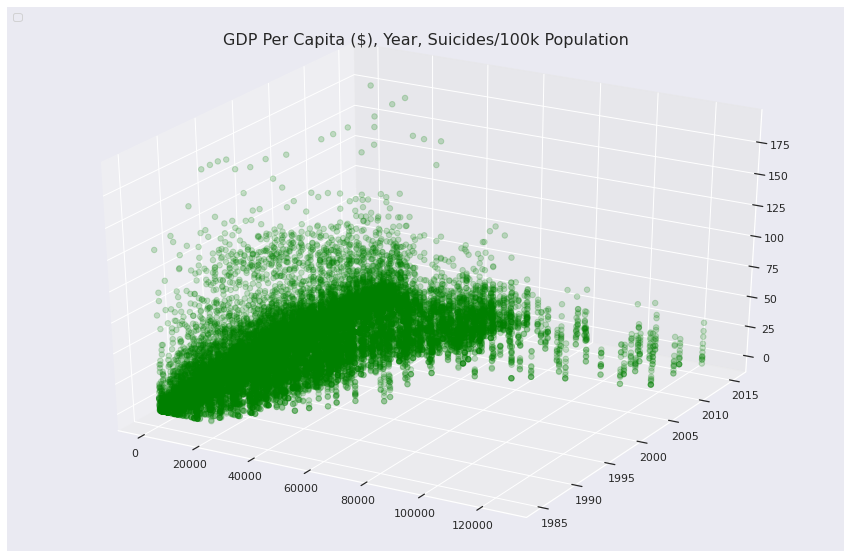

In [0]:
# Create plot
fig = plt.figure()
ax6_t = fig.add_subplot(111, projection='3d')
ax6_t.scatter(data_frame_t['gdpPerCapita'], data_frame_t.year, data_frame_t['suicides100kpop'], alpha=0.2, c="green", s=30, label="")
plt.title('GDP Per Capita ($), Year, Suicides/100k Population', fontsize = 16)
plt.legend(loc=2)
plt.show()

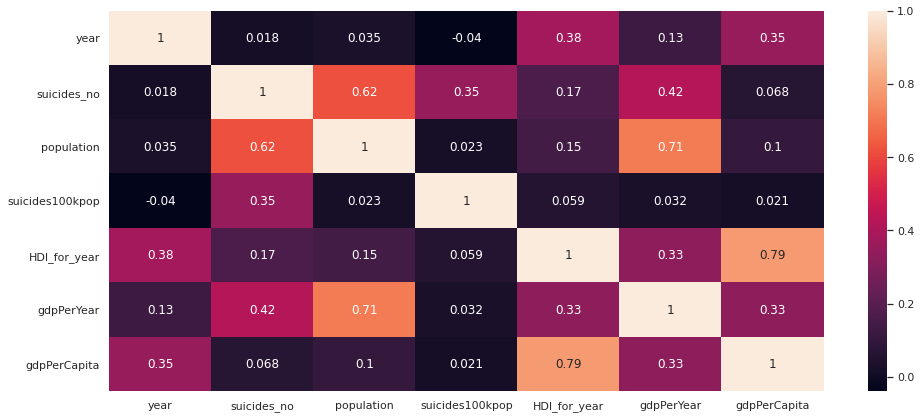

In [0]:
#Correlations between the data 
plt.figure(figsize=(16,7))
cor = sns.heatmap(data_frame_t.corr(), annot = True)

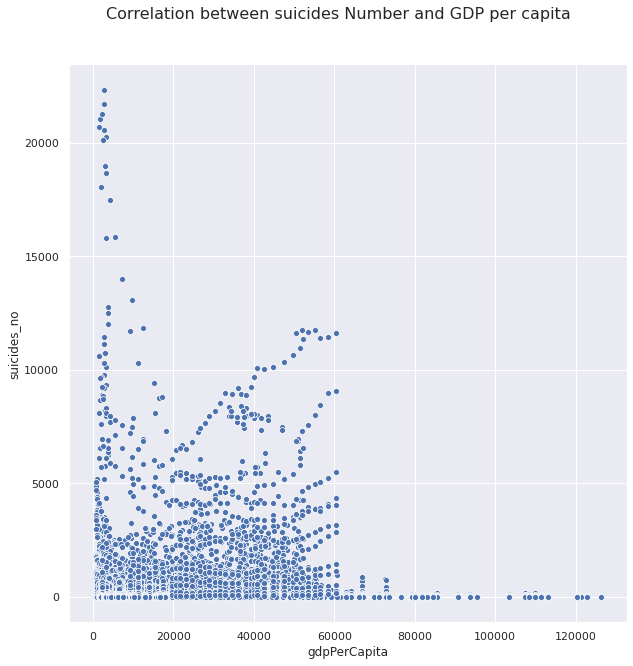

In [0]:
fig = plt.figure(figsize=(10,10))
plt.subplots_adjust(top=0.9)
fig.suptitle('Correlation between suicides Number and GDP per capita', fontsize=16)
sns.scatterplot(data=data_frame_l,x='gdpPerCapita',y='suicides_no')

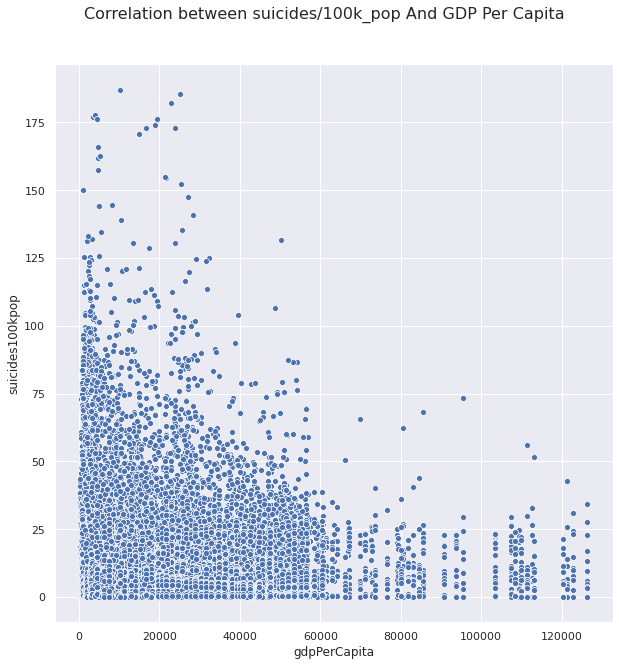

In [0]:
fig = plt.figure(figsize=(10,10))
plt.subplots_adjust(top=0.9)
fig.suptitle('Correlation between suicides/100k_pop And GDP Per Capita', fontsize=16)
sns.scatterplot(data=data_frame_l,x='gdpPerCapita',y='suicides100kpop')

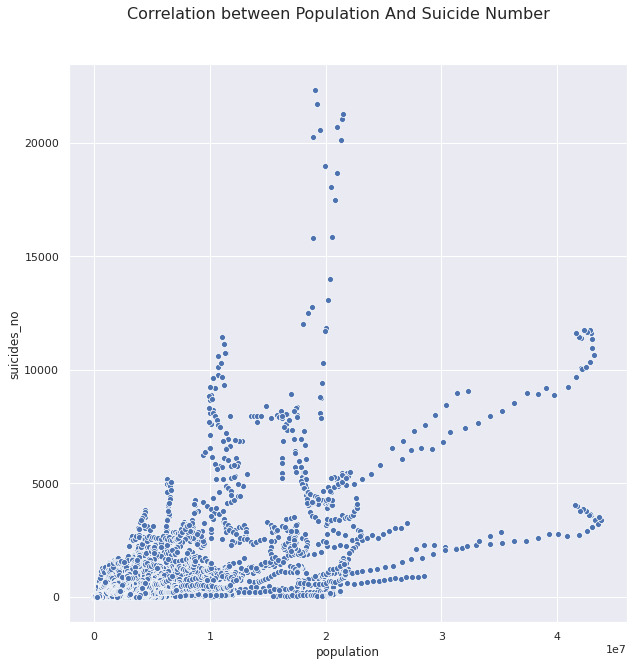

In [0]:
fig = plt.figure(figsize=(10,10))
plt.subplots_adjust(top=0.9)
fig.suptitle('Correlation between Population And Suicide Number', fontsize=16)
sns.scatterplot(data=data_frame_l,x='population',y='suicides_no')

In [9]:
from scipy.stats import pearsonr
from scipy.stats import spearmanr

#  gdp_per_capita & suicide_no
# Pearsons correlation: 0.068
# Spearmans correlation: 0.149

# gdp_per_capita & suicides100kpop
# Pearsons correlation: 0.021
# Spearmans correlation: 0.088

# population & suicide_no
# Pearsons correlation: 0.619
# Spearmans correlation: 0.789

gdp_per_capita = data_frame_t['gdpPerCapita']
suicide_no = data_frame_t['suicides_no']
suicides100kpop = data_frame_t['suicides100kpop']
population = data_frame_t['population']

corr1, _ = pearsonr(gdp_per_capita, suicide_no)
print('Pearsons correlation: %.3f' % corr1)

corr2, _ = spearmanr(gdp_per_capita, suicide_no)
print('Spearmans correlation: %.3f' % corr2)

Pearsons correlation: 0.062
Spearmans correlation: 0.101


In [0]:
#Creating a temporary data frame for processing
df1_p = data_frame_p[["country","year","sex","age","suicides100kpop"]]

#Modifying the year gropus in to decades
def decade_mapping(data):
    if 1987<= data <= 1996:
        return "1987-1996"
    elif 1997<= data <= 2006:
        return "1997-2006"
    else:
        return "2007-2015"

df1_p.year = df1_p.year.apply(decade_mapping)

df1_p.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5303: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,country,year,sex,age,suicides100kpop
264,Antigua and Barbuda,2007-2015,female,15-24 years,0.0
265,Antigua and Barbuda,2007-2015,female,25-34 years,0.0
266,Antigua and Barbuda,2007-2015,female,35-54 years,0.0
267,Antigua and Barbuda,2007-2015,female,5-14 years,0.0
268,Antigua and Barbuda,2007-2015,female,55-74 years,0.0


In [0]:
#Group by country and year and taking the sum
df1_p = df1_p.groupby(["country","year"]).sum().reset_index()
df1_p.head()

,country,year,suicides100kpop
0,Antigua and Barbuda,1987-1996,32.24
1,Antigua and Barbuda,1997-2006,123.30
2,Antigua and Barbuda,2007-2015,23.60
3,Argentina,1987-1996,1305.97
4,Argentina,1997-2006,1293.64


In [0]:
#countries having data of three decades
three_decades = df1_p.country.value_counts().reset_index(name = "count")
three_decades.columns = ["country", "counts"]
three_decade_countries = three_decades[three_decades.counts == 3].country.tolist()

three_decades.head()

,country,counts
0,Antigua and Barbuda,3
1,Sweden,3
2,Romania,3
3,Portugal,3
4,Netherlands,3


In [0]:
nations_list = three_decade_countries
years = df1_p.year.unique()
safe_zones = []
danger_zones = []
for country in nations_list:
    s_year1 = float(df1_p[(df1_p.country == country) & (df1_p.year == "1987-1996")]["suicides100kpop"])
    s_year2 = float(df1_p[(df1_p.country == country) & (df1_p.year == "1997-2006")]["suicides100kpop"])
    s_year3 = float(df1_p[(df1_p.country == country) & (df1_p.year == "2007-2015")]["suicides100kpop"])
    if s_year1 <= s_year2 <= s_year3:
        danger_zones.append(country)
    if s_year1 >= s_year2 >= s_year3:
        safe_zones.append(country)

#print the danger zone countries list
print("Danger zone countries list:") 
print(*danger_zones, sep = "\n") 

#print the safe zone countries list
print("\nSafe zone countries list:") 
print(*safe_zones, sep = "\n") 

Danger zone countries list:
Poland
Republic of Korea
Japan
Ecuador
Brazil
Mexico
Thailand
Chile
Paraguay
Suriname

Safe zone countries list:
Sweden
Canada
Luxembourg
Mauritius
Bulgaria
Spain
Turkmenistan
Israel
France
New Zealand
Norway
Finland
Trinidad and Tobago
Grenada


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

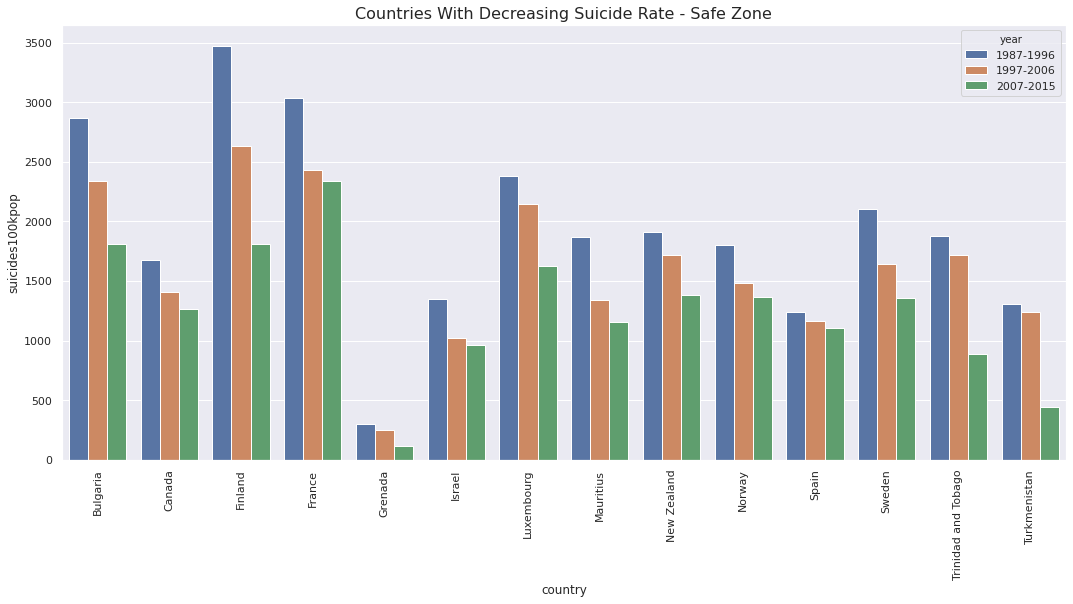

In [0]:
#Safe zone countries graph
plt.figure(figsize=(18,8))
sns.barplot(x = "country", y = "suicides100kpop", hue = "year",data = df1_p[df1_p.country.isin(safe_zones)]).set_title("Countries With Decreasing Suicide Rate - Safe Zone", fontsize=16)
plt.xticks(rotation = 90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

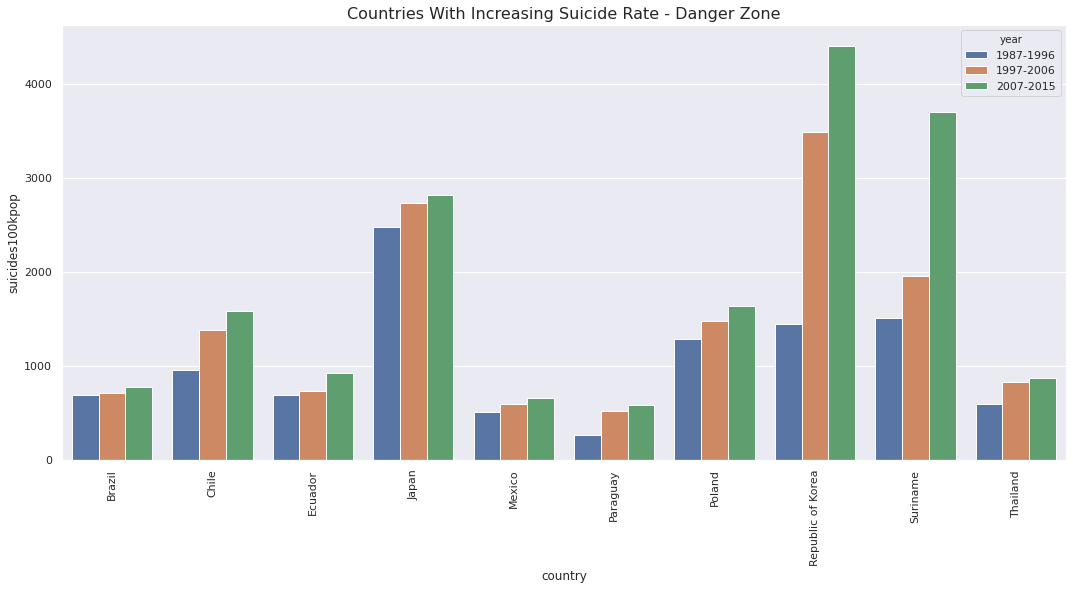

In [0]:
#Danger zone countries graph
plt.figure(figsize=(18,8))
sns.barplot(x = "country", y = "suicides100kpop", hue = "year",data = df1_p[df1_p.country.isin(danger_zones)]).set_title("Countries With Increasing Suicide Rate - Danger Zone", fontsize=16)
plt.xticks(rotation = 90)

In [0]:
from pandas import read_csv
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

data_frame_ml = data_frame_original.copy()
data_frame_ml = data_frame_ml[["year","suicides100kpop"]]

data_frame_ml = data_frame_ml.groupby(['year']).sum()['suicides100kpop']
data_frame_ml.head()

data_frame_ml.to_csv(r'/content/drive/My Drive/MSC/machine_learning.csv', index = False)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning:

The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.



predicted=9423.353201, expected=8855.710000
predicted=8724.118172, expected=8974.080000
predicted=9018.862171, expected=9005.530000
predicted=8735.004867, expected=8830.040000
predicted=8903.376569, expected=8785.120000
predicted=8729.813283, expected=8860.180000
predicted=8864.569348, expected=8321.010000
predicted=8236.586872, expected=8598.710000
predicted=8783.619178, expected=7825.520000
predicted=7595.441793, expected=7519.120000
predicted=7660.645880, expected=6079.420000
Test MSE: 388684.863


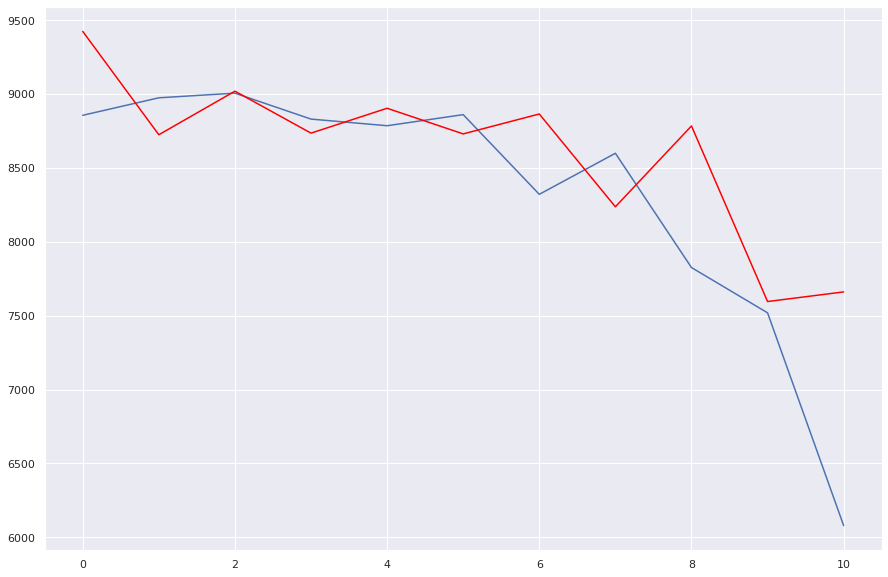

In [0]:
def parser(x):
	return datetime.strptime(x+'-01', '%Y-%m')
date_parser=parser

series = read_csv('/content/drive/My Drive/MSC/machine_learning.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)

X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()